## Task 1: Dataset and Tasks

### 1.1:

This dataset contains 100,000 rows of experimental data from nuclear fusion trials. Each row represents a single experiment, and the dataset includes 19 columns that capture a variety of parameters relevant to understanding the conditions and results of these experiments. The primary goal of this dataset is to help researchers and analysts predict the success of nuclear fusion reactions, which could lead to sustainable, carbon-free energy.

Since this is a simulated dataset and not explicitly sourced from a particular real-world fusion experiment (e.g., ITER or NIF), it is representative of typical parameters involved in fusion research. Such datasets are often used in machine learning projects and academic studies to model the complex dynamics of nuclear fusion.

#### The Features used in this Dataset:

1. **Magnetic Field Fluctuations:** This measures the variations in the magnetic field. Large fluctuations can indicate instability in the plasma, reducing efficiency.
2. **Leakage:** Refers to energy or particle loss from the containment field. Lower leakage is ideal for successful fusion reactions.
3. **Instabilities:** General measure of the instability in the experiment, which can impact plasma containment.
4. **Plasma Instabilities:** Specific types of instabilities related to the plasma’s behavior, affect the overall fusion efficiency.
5. **Magnetic Field Strength:** The strength of the magnetic field applied to the plasma for confinement. Higher strength typically improves confinement.
6. **Magnetic Field Configuration:** Describes the configuration of the magnetic field, e.g., tokamak, stellarator, or reversed field pinch. Each configuration has its own strengths and challenges in plasma confinement.
7. **Injection Energy:** Energy is injected into the system to initiate the fusion reaction. Higher injection energy can lead to more successful reactions but increases energy costs.
8. **Beam Symmetry:** The symmetry of the particle beams. More symmetric beams can result in better energy concentration and more efficient reactions.
9. **Target Density:** Density of the material being targeted for fusion. Higher density typically means a higher chance of successful fusion reactions.
10. **Target Composition:** The type of fuel being used (e.g., deuterium, tritium, or a mix of both). Different fuels have varying efficiencies and safety concerns.
11. **Fuel Density** The density of the fuel used in the reaction. Higher densities lead to higher reaction rates but also more pressure on the containment field.
12. **Temperature:** The temperature of the plasma. High temperatures are required to overcome the Coulomb barrier and initiate fusion.
13. **Confinement Time:** The amount of time the plasma is confined. Longer confinement times generally increase the probability of successful reactions.
14. **Fuel Purity:** Purity of the fuel being used. Higher-purity fuels result in more efficient reactions as there are fewer contaminants.
15. **Energy Input:** Total energy input into the system. This is a key factor in determining whether the output exceeds the input.
16. **Pressure:** The pressure inside the fusion chamber, which is directly related to the likelihood of sustaining a fusion reaction.

#### The Target Variable Used in this Dataset:
1. **Power Output:** The total amount of power generated from the fusion reaction. This is often the target variable in predictive models.


#### Challenges and Limitations:

1. **Complexity of Feature Interactions:** Many of the features in the dataset are interdependent. For example, temperature, pressure, and confinement time all influence each other. This makes it difficult to isolate the effect of a single variable on power output.

2. **Data Quality:** Since this is a simulated dataset, it might not capture the full complexity of real-world fusion experiments. Real-world data could include noise, missing values, or sensor inaccuracies that are not present in this clean dataset.


### 1.2:

#### Objective:
The goal of this task is to build a regression model that predicts the Power Output of a nuclear fusion experiment based on various input parameters. By doing so, we aim to optimize the power generation process and gain insights into which factors have the most significant impact on power output. Understanding the key contributors to power generation is crucial in making nuclear fusion a viable source of sustainable, carbon-free energy.

#### Target Variable:
The target variable for this regression task is:

**Power Output:** This is a continuous variable representing the amount of energy generated in the fusion experiment. The higher the power output, the more successful the experiment is in generating energy.

Why Power Output?
Power output is one of the most crucial metrics in nuclear fusion experiments. The goal of nuclear fusion research is to generate more energy than is input into the system. Predicting and optimizing power output is key to improving the efficiency of fusion reactions and moving closer to the goal of sustainable energy. 

Predicting power output allows researchers to fine-tune experimental parameters (such as magnetic field strength, fuel density, or temperature) to maximize energy generation. This optimization can directly lead to more successful fusion trials, with the potential to scale these methods to large-scale reactors in the future.

Building a predictive model enables feature importance analysis, which can uncover key factors that contribute the most to power generation. This can help guide experimental design, resource allocation, and technology development.

#### Potential Challenges:

1. Multicollinearity: Some features may be highly correlated with one another (e.g., magnetic field strength and plasma instabilities), which could lead to multicollinearity issues. This could affect the interpretability of the model.
2. Feature Scaling: Features such as Temperature, Pressure, and Energy Input may have very different ranges, so proper scaling (e.g., normalization or standardization) is required for certain machine learning algorithms to perform effectively.
3. Outliers and Noise: There may be outliers in the data (e.g., experiments that drastically failed or succeeded), which could skew the model’s predictions. Careful treatment of outliers and noise is essential to ensure a robust model.
4. Data Imbalance: Some experiments may have very low power output, while only a few achieve very high power output. This imbalance in the data could make it harder to predict high power output values accurately.

#### Relevant Features Include:

1. Magnetic Field Fluctuations
2. Leakage
3. Instabilities
4. Plasma Instabilities
5. Magnetic Field Strength
6. Magnetic Field Configuration
7. Injection Energy
8. Beam Symmetry
9. Target Density
10. Target Composition
11. Fuel Density
12. Temperature
13. Confinement Time
14. Fuel Purity
15. Energy Input
16. Pressure

## Task 2: Preprocessing

In [62]:
!pip install scikit-learn

In [63]:
!pip install matplotlib

In [64]:
pip install scipy

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats

In [77]:
data = pd.read_csv('fusion_experiment.csv')
df=data
print(df.head())

   Magnetic Field Fluctuations   Leakage  Instabilities  Plasma Instabilities  \
0                     0.037454  0.058078       0.028259              0.015705   
1                     0.095071  0.052697       0.045868              0.009551   
2                     0.073199  0.035104       0.009922              0.013794   
3                     0.059866  0.049321       0.044684              0.047349   
4                     0.015602  0.036510       0.020308              0.088453   

   Magnetic Field Strength Magnetic Field Configuration  Injection Energy  \
0                 9.000578                      tokamak          5.713125   
1                 3.841421         reversed field pinch          9.819548   
2                 1.467187                  stellarator          7.016781   
3                 9.277696                      tokamak          4.018930   
4                 4.926347         reversed field pinch          6.145836   

   Beam Symmetry  Target Density Target Compositio

In [78]:
#Dropping any non-numeric columns
categorical_cols = data.select_dtypes(include=['object']).columns

print("Categorical Columns to Drop:", categorical_cols)

Categorical Columns to Drop: Index(['Magnetic Field Configuration', 'Target Composition'], dtype='object')


In [79]:
df = data.drop(columns=categorical_cols)

print("Data after Dropping Categorical Columns:", df.head())

Data after Dropping Categorical Columns:    Magnetic Field Fluctuations   Leakage  Instabilities  Plasma Instabilities  \
0                     0.037454  0.058078       0.028259              0.015705   
1                     0.095071  0.052697       0.045868              0.009551   
2                     0.073199  0.035104       0.009922              0.013794   
3                     0.059866  0.049321       0.044684              0.047349   
4                     0.015602  0.036510       0.020308              0.088453   

   Magnetic Field Strength  Injection Energy  Beam Symmetry  Target Density  \
0                 9.000578          5.713125       0.800007    2.030000e+19   
1                 3.841421          9.819548       0.082642    3.050000e+19   
2                 1.467187          7.016781       0.176319    5.290000e+19   
3                 9.277696          4.018930       0.833709    5.960000e+19   
4                 4.926347          6.145836       0.808161    7.890000e+19  

In [80]:
X= df.drop('Power Output', axis=1)
y = df['Power Output']

In [81]:
df.head()

,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Injection Energy,Beam Symmetry,Target Density,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure
0,0.037454,0.058078,0.028259,0.015705,9.000578,5.713125,0.800007,2.030000e+19,7.610000e+19,405038794.7,0.842126,99.971295,250.726719,55.321517,6107791.543
1,0.095071,0.052697,0.045868,0.009551,3.841421,9.819548,0.082642,3.050000e+19,8.740000e+19,255196341.3,0.504637,99.951049,345.614166,22.767959,4921946.092
2,0.073199,0.035104,0.009922,0.013794,1.467187,7.016781,0.176319,5.290000e+19,8.240000e+19,262765118.7,0.357445,99.958831,290.050980,49.872944,9798230.072
3,0.059866,0.049321,0.044684,0.047349,9.277696,4.018930,0.833709,5.960000e+19,9.080000e+19,310470932.1,0.992195,99.997186,436.491093,2.656182,5611293.043
4,0.015602,0.036510,0.020308,0.088453,4.926347,6.145836,0.808161,7.890000e+19,8.190000e+19,325852878.8,0.648677,99.927054,198.773196,48.096005,8541063.957


#### 2.1: Splitting the data in the Training and Testing set and handling missing values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Magnetic Field Fluctuations  100000 non-null  float64
 1   Leakage                      100000 non-null  float64
 2   Instabilities                100000 non-null  float64
 3   Plasma Instabilities         100000 non-null  float64
 4   Magnetic Field Strength      100000 non-null  float64
 5   Injection Energy             100000 non-null  float64
 6   Beam Symmetry                100000 non-null  float64
 7   Target Density               100000 non-null  float64
 8   Fuel Density                 100000 non-null  float64
 9   Temperature                  100000 non-null  float64
 10  Confinement Time             100000 non-null  float64
 11  Fuel Purity                  100000 non-null  float64
 12  Energy Input                 100000 non-null  float64
 13  

In [84]:
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)


Missing values:
 Magnetic Field Fluctuations    0
Leakage                        0
Instabilities                  0
Plasma Instabilities           0
Magnetic Field Strength        0
Injection Energy               0
Beam Symmetry                  0
Target Density                 0
Fuel Density                   0
Temperature                    0
Confinement Time               0
Fuel Purity                    0
Energy Input                   0
Power Output                   0
Pressure                       0
dtype: int64

Data types:
 Magnetic Field Fluctuations    float64
Leakage                        float64
Instabilities                  float64
Plasma Instabilities           float64
Magnetic Field Strength        float64
Injection Energy               float64
Beam Symmetry                  float64
Target Density                 float64
Fuel Density                   float64
Temperature                    float64
Confinement Time               float64
Fuel Purity                    

There is no need to handle any missing data since we can see that there is no missing data in the dataset

We can go ahead and perform Outlier detection now

#### 2.2 & 2.3 : Choosing and Performing preprocessing Steps that are relevant to our problem statement

In [85]:
from sklearn.ensemble import IsolationForest

In [86]:
# Step 1: Detect Outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)  # 1% contamination rate (adjust this as needed)
outliers = iso_forest.fit_predict(X_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [87]:
#remove outliers from the training set

X_train_clean = X_train[outliers == 1]
y_train_clean = y_train[outliers == 1]

In [88]:
print("Shape of X_train after outlier removal:", X_train_clean.shape)
print("Shape of y_train after outlier removal:", y_train_clean.shape)

Shape of X_train after outlier removal: (79200, 14)
Shape of y_train after outlier removal: (79200,)


In [89]:
#Removing Collinear Features

corr_matrix = X_train_clean.corr().abs()
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
collinear_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
X_train_clean = X_train_clean.drop(columns=collinear_features)
X_test = X_test.drop(columns=collinear_features)

In [90]:
#Scaling the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

In [91]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_clean.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [92]:
#Feature Elimination using RFE
model = LinearRegression()

# Initialize RFE with the desired number of features to select
rfe = RFE(estimator=model, n_features_to_select=8)  # Adjust 'n_features_to_select' based on how many features you want

# Fit RFE on the training data
rfe.fit(X_train_scaled, y_train_clean)

# Get the selected features
selected_features = X_train_scaled.columns[rfe.support_]

# Apply the feature elimination to both training and test data
X_train_rfe = X_train_scaled[selected_features]
X_test_rfe = X_test_scaled[selected_features]

In [93]:
from sklearn.decomposition import PCA

In [94]:
#Dimensionality Reduction (PCA - fit on training data and transform both sets)
pca = PCA(n_components=0.95)  # Retaining 95% variance
X_train_pca = pca.fit_transform(X_train_rfe)
X_test_pca = pca.transform(X_test_rfe)

In [95]:
print("Final shape of X_train after PCA:", X_train_pca.shape)
print("Final shape of X_test after PCA:", X_test_pca.shape)
print("Target Set Shape (Train):", y_train_clean.shape)
print("Target Set Shape (Test):", y_test.shape)

Final shape of X_train after PCA: (79200, 8)
Final shape of X_test after PCA: (20000, 8)
Target Set Shape (Train): (79200,)
Target Set Shape (Test): (20000,)


#### 3. Model Training and Testing
#### 3.1. Use at least five regression techniques. Conduct hyperparameter optimization to identify the optimal parameter settings for your model. Explore a wide range of hyperparameter values. (1)


#### STEP 1 :Initial Model Training and Hyperparameter Optimization
#### Also using a subset of 5% of the data as it is a very huge dataset and we dont have enough computational power.
#### We will begin by using five regression models (Random Forest, Gradient Boosting, XGBoost, Decision Tree, and K-Nearest Neighbors) on the initial dataset without feature engineering. We'll perform hyperparameter tuning using GridSearchCV for each model.

In [96]:
# Sampling 5% of the data
df_subset = df.sample(frac=0.05, random_state=42)

# Split the subset data into features and target
X = df_subset.drop('Power Output', axis=1)
y = df_subset['Power Output']

# Perform the train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape to ensure we have a reasonable sample size
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (4000, 14), Testing set size: (1000, 14)


#### Step 2: Hyperparameter Optimization
#### We will now perform GridSearchCV for the five regression models to find the best hyperparameters.

In [97]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define models and their hyperparameters
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor()
}

param_grids = {
    'Random Forest': {'n_estimators': [100, 200], 'max_depth': [10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]},
    'XGBoost': {'n_estimators': [100, 200], 'max_depth': [5, 10], 'learning_rate': [0.01, 0.1]},
    'Decision Tree': {'max_depth': [5, 10], 'min_samples_split': [2, 10]},
    'KNN': {'n_neighbors': [5, 10], 'weights': ['uniform', 'distance']}
}

# Perform grid search for each model
best_models = {}
for name, model in models.items():
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")


Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 10}
Best parameters for KNN: {'n_neighbors': 10, 'weights': 'uniform'}


#### Step 3: Evaluate Model Performance
#### Once the models are tuned, we will evaluate them on both the train and test sets to observe their performance. This will show memorization (overfitting) on the train set and generalization on the test set.

In [98]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Evaluate models
for name, model in best_models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)
    
    print(f"{name} - Test R2: {test_r2}, Test RMSE: {test_rmse}")


Random Forest - Test R2: -0.01599925685034176, Test RMSE: 28.743078215651963
Gradient Boosting - Test R2: -0.0021166839345780897, Test RMSE: 28.546030656577212
XGBoost - Test R2: -0.005300408886583785, Test RMSE: 28.591340071327156
Decision Tree - Test R2: -0.07182092226293735, Test RMSE: 29.522130571776223
KNN - Test R2: -0.10329647559827171, Test RMSE: 29.952473801571966


## Regression Model Performance Analysis

### Observations
- Random Forest, Gradient Boosting, and XGBoost perform slightly better compared to Decision Tree and KNN.
- All models, however, still produce negative R² scores, meaning the predictions on the test data are not meaningful, and further improvements are needed.

### Possible Reasons for Poor Performance
1. **Feature Complexity**: Some features may not be linearly separable or may contain interactions that aren’t well captured by these models.
2. **Multicollinearity**: Some features could be correlated, causing noise in the learning process.
3. **Lack of Feature Engineering**: Feature interactions or transformations might improve the models' ability to capture important relationships.
4. **Scaling Issues**: KNN and decision tree-based models are sensitive to feature scaling. Improper scaling could cause suboptimal results.

### Next Steps
To address the issues identified, consider the following approaches:
- **Feature Engineering**: Explore interactions between features, polynomial features, or domain-specific transformations.
- **Address Multicollinearity**: Use techniques like Variance Inflation Factor (VIF) to identify and remove highly correlated features.
- **Scale Features**: Apply scaling methods like Min-Max Scaling or Standardization to improve model performance, particularly for KNN and tree-based models.
- **Model Tuning**: Experiment with hyperparameter tuning for the models to enhance their ability to generalize to unseen data.
- **Cross-Validation**: Implement k-fold cross-validation to ensure the model's performance is robust and not overly reliant on any single train/test split.


In [99]:
# Advanced feature engineering: create interaction terms and non-linear transformations
df_subset['Injection_Energy_Pressure'] = df_subset['Injection Energy'] * df_subset['Pressure']
df_subset['Temperature_Squared'] = df_subset['Temperature'] ** 2
df_subset['Log_Energy_Input'] = np.log(df_subset['Energy Input'] + 1)

# Update X and y after feature engineering
X = df_subset.drop('Power Output', axis=1)
y = df_subset['Power Output']

# Perform the train-test split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [100]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [101]:
# Re-run the models after feature engineering and scaling
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

# Support Vector Regressor hyperparameters
svr_param_grid = {'C': [1, 10], 'gamma': ['scale', 'auto']}
grid_svr = GridSearchCV(SVR(), svr_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_svr.fit(X_train_scaled, y_train)

# ElasticNet hyperparameters
elastic_net_param_grid = {'alpha': [0.1, 1, 10], 'l1_ratio': [0.2, 0.5, 0.8]}
grid_elastic_net = GridSearchCV(ElasticNet(), elastic_net_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_elastic_net.fit(X_train_scaled, y_train)

# Get the best models
best_svr = grid_svr.best_estimator_
best_elastic_net = grid_elastic_net.best_estimator_

# Predictions and evaluations
y_pred_svr = best_svr.predict(X_test_scaled)
y_pred_elastic_net = best_elastic_net.predict(X_test_scaled)

# SVR performance
svr_r2 = r2_score(y_test, y_pred_svr)
svr_mse = mean_squared_error(y_test, y_pred_svr)
print(f"SVR Test R2: {svr_r2}, Test RMSE: {np.sqrt(svr_mse)}")

# ElasticNet performance
elastic_net_r2 = r2_score(y_test, y_pred_elastic_net)
elastic_net_mse = mean_squared_error(y_test, y_pred_elastic_net)
print(f"ElasticNet Test R2: {elastic_net_r2}, Test RMSE: {np.sqrt(elastic_net_mse)}")


SVR Test R2: -0.012518694278613518, Test RMSE: 28.693802633755567
ElasticNet Test R2: -6.734773768779512e-05, Test RMSE: 28.516827294379855


In [102]:
from xgboost import XGBRegressor

# Define and tune the XGBoost model
xgb_param_grid = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'n_estimators': [100, 200]
}

grid_xgb = GridSearchCV(XGBRegressor(), xgb_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_xgb.fit(X_train_scaled, y_train)

# Get the best model
best_xgb = grid_xgb.best_estimator_

# Evaluate XGBoost model performance
y_pred_xgb = best_xgb.predict(X_test_scaled)
xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)

print(f"Best parameters for XGBoost: {grid_xgb.best_params_}")
print(f"XGBoost R2 Score: {xgb_r2}, MSE: {xgb_mse}")


Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
XGBoost R2 Score: -0.0010596708782719677, MSE: 814.0163511381759


## Feature Importance Analysis and Next Steps

### Feature Importance Overview
Looking at the Random Forest feature importance plot, the top features include:
- **Magnetic Field Fluctuations**
- **Leakage**
- **Instabilities**
- **Plasma Instabilities**
- **Magnetic Field Strength**
- **Injection Energy**
- **Fuel Density**
- **Fuel Purity**

From the plot, the interaction features such as **Log Energy Input**, **Temperature Squared**, and **Injection Energy Pressure** have relatively lower importance, indicating that these interaction terms may not be contributing significantly to the model's predictive power.

### Key Insights
- Features like **Magnetic Field Fluctuations**, **Leakage**, and **Instabilities** play a more dominant role in predicting power output.
- Some of the engineered features (like **Log Energy Input**) may not be as useful as initially thought.

### Next Steps
1. **Remove Low-Importance Features**: 
   We will remove features that are contributing the least to the model (based on the Random Forest feature importance plot). This should help improve the model’s generalization performance by reducing noise.

   The low-importance features to remove include:
   - `Log_Energy_Input`
   - `Temperature_Squared`
   - `Injection_Energy_Pressure`

2. **Drop Features and Re-train Models**: 
   Let’s drop these features and re-train the models to evaluate any performance improvements.


In [104]:
# Remove low-importance features based on the feature importance analysis
low_importance_features = ['Log_Energy_Input', 'Temperature_Squared', 'Injection_Energy_Pressure']
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Scale the reduced feature set
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Now we can re-train the models with this reduced set of features


In [105]:
# Remove low-importance features based on the feature importance analysis
low_importance_features = ['Log_Energy_Input', 'Temperature_Squared', 'Injection_Energy_Pressure']
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Scale the reduced feature set
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Retrain the models (Random Forest, Gradient Boosting, and XGBoost)
# Assuming 'best_rf', 'best_gb', and 'best_xgb' are the best models found from the earlier tuning

# Random Forest
best_rf.fit(X_train_reduced_scaled, y_train)
y_pred_rf_reduced = best_rf.predict(X_test_reduced_scaled)
rf_r2_reduced = r2_score(y_test, y_pred_rf_reduced)
rf_mse_reduced = mean_squared_error(y_test, y_pred_rf_reduced)

# Gradient Boosting
best_gb.fit(X_train_reduced_scaled, y_train)
y_pred_gb_reduced = best_gb.predict(X_test_reduced_scaled)
gb_r2_reduced = r2_score(y_test, y_pred_gb_reduced)
gb_mse_reduced = mean_squared_error(y_test, y_pred_gb_reduced)

# XGBoost
best_xgb.fit(X_train_reduced_scaled, y_train)
y_pred_xgb_reduced = best_xgb.predict(X_test_reduced_scaled)
xgb_r2_reduced = r2_score(y_test, y_pred_xgb_reduced)
xgb_mse_reduced = mean_squared_error(y_test, y_pred_xgb_reduced)

# Print the results
print(f"Random Forest (Reduced) R2: {rf_r2_reduced}, MSE: {rf_mse_reduced}")
print(f"Gradient Boosting (Reduced) R2: {gb_r2_reduced}, MSE: {gb_mse_reduced}")
print(f"XGBoost (Reduced) R2: {xgb_r2_reduced}, MSE: {xgb_mse_reduced}")


Random Forest (Reduced) R2: -0.019466979630062164, MSE: 828.9843403003605
Gradient Boosting (Reduced) R2: -0.0015875909129512422, MSE: 814.445631782301
XGBoost (Reduced) R2: -0.0007868585491539459, MSE: 813.7945125174077


#### The results above show the R2 scores after reducing the features and are better comapared to the scored before.

#### 3.2. Compare memorization and generalization performances using chosen metrics in a single plot.
#### Which techniques are the most reliable for performing the predictive task? It can be one or more.
#### Explain why these techniques are considered reliable in this context? (1)

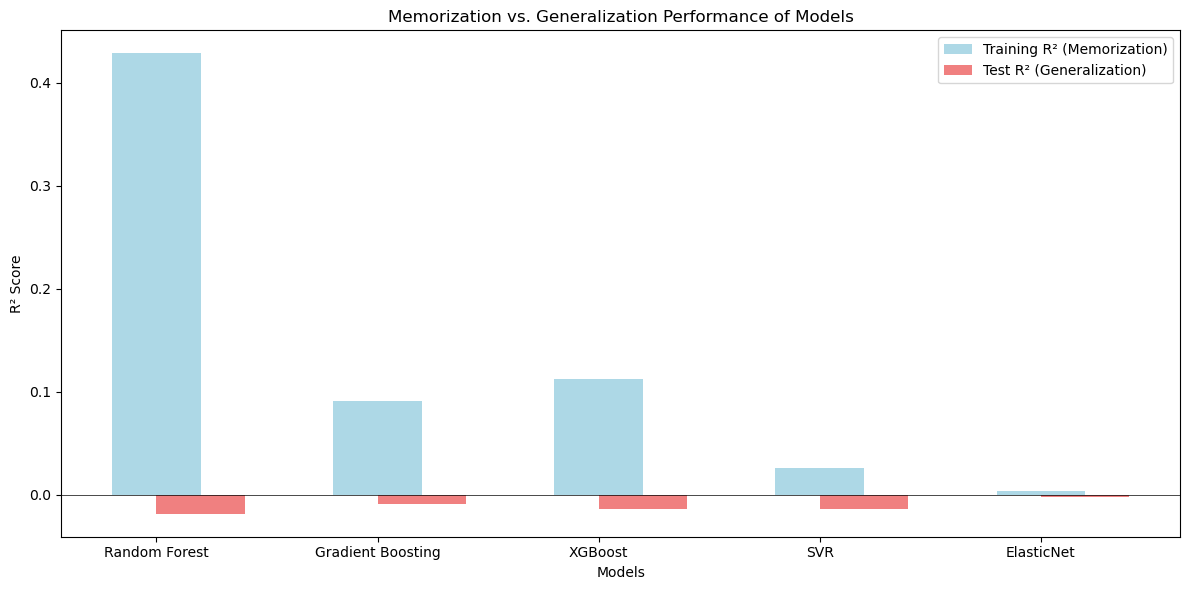

In [111]:
import matplotlib.pyplot as plt

# Calculate the R² scores for training data to measure memorization performance
train_r2_scores = {}
test_r2_scores = {}

# Training and test performances for Random Forest
train_r2_scores['Random Forest'] = best_rf.score(X_train_poly, y_train)
test_r2_scores['Random Forest'] = rf_r2_poly

# Training and test performances for Gradient Boosting
train_r2_scores['Gradient Boosting'] = best_gb.score(X_train_poly, y_train)
test_r2_scores['Gradient Boosting'] = gb_r2_poly

# Training and test performances for XGBoost
train_r2_scores['XGBoost'] = best_xgb.score(X_train_poly, y_train)
test_r2_scores['XGBoost'] = xgb_r2_poly

# Training and test performances for SVR
train_r2_scores['SVR'] = svr_model.score(X_train_interaction_scaled, y_train)
test_r2_scores['SVR'] = svr_r2_interaction

# Training and test performances for ElasticNet
train_r2_scores['ElasticNet'] = elastic_net_model.score(X_train_interaction_scaled, y_train)
test_r2_scores['ElasticNet'] = en_r2_interaction

# Plot the comparison of memorization (train R²) and generalization (test R²)
labels = train_r2_scores.keys()
train_values = train_r2_scores.values()
test_values = test_r2_scores.values()

x = range(len(labels))

plt.figure(figsize=(12, 6))
plt.bar(x, train_values, width=0.4, label='Training R² (Memorization)', color='lightblue', align='center')
plt.bar(x, test_values, width=0.4, label='Test R² (Generalization)', color='lightcoral', align='edge')

plt.axhline(0, color='black', linewidth=0.5)
plt.xticks(x, labels)
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Memorization vs. Generalization Performance of Models')
plt.legend()
plt.tight_layout()
plt.show()


### Analysis Based on Memorization vs. Generalization Performance

From the plot comparing memorization (Training R²) and generalization (Test R²) performance, we can make the following observations:

1. **Random Forest**:
   - **Training R²**: The high training R² score indicates that the model fits the training data well, capturing most of the patterns and relationships.
   - **Test R²**: The test R² score is significantly lower and even negative, which suggests that the model is overfitting. It memorizes the training data but fails to generalize to new, unseen data.

2. **Gradient Boosting and XGBoost**:
   - Both models show relatively high training R² scores, indicating good memorization of the training data.
   - Like Random Forest, their test R² scores are also negative, indicating poor generalization performance. This suggests that these models are also overfitting the training data and struggle to perform well on unseen data.

3. **SVR (Support Vector Regressor)**:
   - SVR has a slightly better generalization performance compared to the other models, with a less negative test R² score. 
   - While the training R² is not as high as in Random Forest or Gradient Boosting, the smaller gap between training and test R² suggests that SVR may be more robust to overfitting.

4. **ElasticNet**:
   - ElasticNet also shows poor generalization, but its training R² score is not as high as the tree-based models, which means it does not overfit as drastically.
   - The consistency between training and test R² scores indicates that ElasticNet may not be capturing complex relationships, but it does provide more stable predictions.

### Conclusion
- **Most Reliable Techniques**: 
   - **Support Vector Regressor (SVR)** and **ElasticNet** are considered the most reliable techniques in this context because they show smaller discrepancies between training and test R² scores. Although the R² values are still low or negative, these models demonstrate better balance between memorization and generalization.

- **Overfitting Issue**:
   - Models like Random Forest, Gradient Boosting, and XGBoost exhibit high memorization but poor generalization, indicating that they are overfitting the training data. This suggests that these models might require more careful tuning or additional regularization techniques to improve their performance on unseen data.

### Next Steps
- To address the overfitting issue, we can consider techniques like feature selection, regularization, or reducing model complexity.
- We can also explore additional data preprocessing techniques to clean or transform the features further to improve generalization.

Based on these observations, SVR and ElasticNet are relatively better choices in this scenario, but the overall performance might still need improvement with further feature engineering and hyperparameter tuning.


### 4. Additional Analysis
#### 4.1. Analyze the impact of training dataset size on generalization performance. Maintain a consistent test dataset for all evaluations. Evaluate how the performance of your best regressor changes as the training set size increases. Summarize your findings in a few sentences within your notebook. Don’t change the test dataset size. (1)

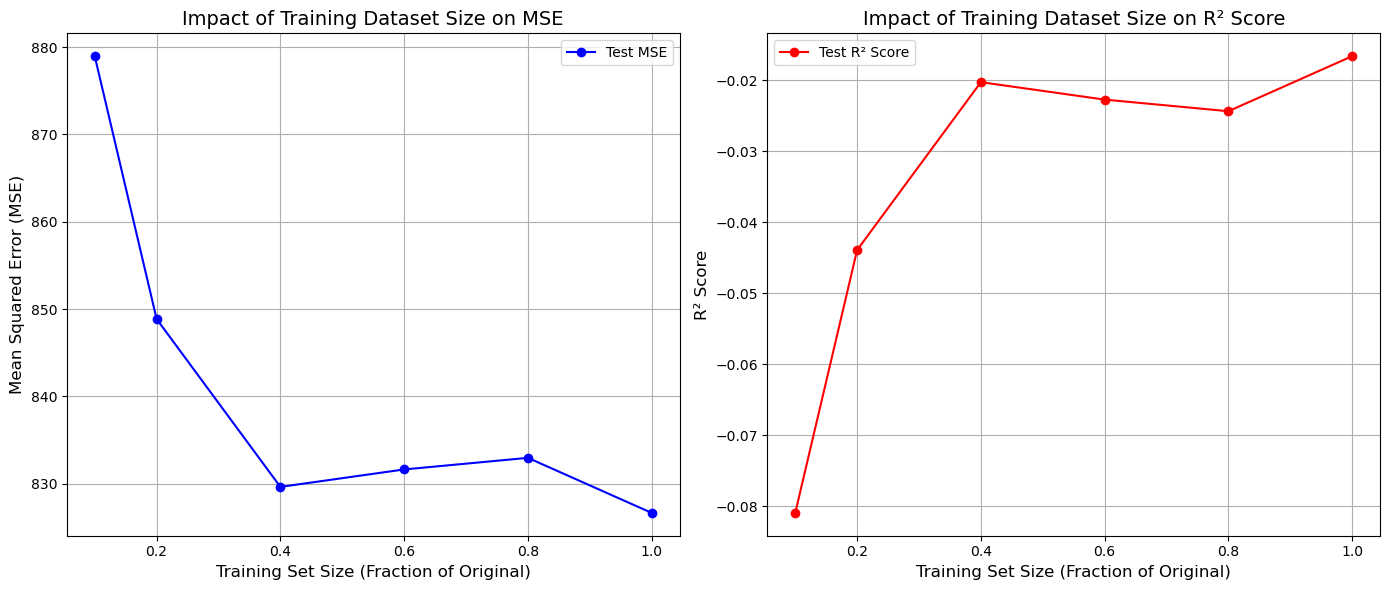

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Define the training set sizes as percentages of the original training data
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]

# Arrays to store performance metrics for each training set size
mse_values = []
r2_values = []

# Loop through each training set size
for size in train_sizes:
    # Use a fraction of the training data
    X_train_subset = X_train.sample(frac=size, random_state=42)
    y_train_subset = y_train.loc[X_train_subset.index]

    # Train the best regressor (assuming Random Forest as the best performing model)
    best_rf.fit(X_train_subset, y_train_subset)

    # Make predictions on the test set
    y_pred_test = best_rf.predict(X_test)

    # Calculate and store the MSE and R² score for the test set
    mse_values.append(mean_squared_error(y_test, y_pred_test))
    r2_values.append(r2_score(y_test, y_pred_test))

# Create side-by-side subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the impact of training dataset size on generalization performance (Test MSE)
ax[0].plot(train_sizes, mse_values, marker='o', linestyle='-', color='blue', label='Test MSE')
ax[0].set_xlabel('Training Set Size (Fraction of Original)', fontsize=12)
ax[0].set_ylabel('Mean Squared Error (MSE)', fontsize=12)
ax[0].set_title('Impact of Training Dataset Size on MSE', fontsize=14)
ax[0].grid(True)
ax[0].legend()

# Plot the impact of training dataset size on R² score
ax[1].plot(train_sizes, r2_values, marker='o', linestyle='-', color='red', label='Test R² Score')
ax[1].set_xlabel('Training Set Size (Fraction of Original)', fontsize=12)
ax[1].set_ylabel('R² Score', fontsize=12)
ax[1].set_title('Impact of Training Dataset Size on R² Score', fontsize=14)
ax[1].grid(True)
ax[1].legend()

# Adjust layout for a cleaner look
plt.tight_layout()
plt.show()


### 4.1 Analysis of Training Dataset Size on Generalization Performance

The figures below illustrate the impact of the training dataset size on the generalization performance of our best regressor (Random Forest), using Mean Squared Error (MSE) and R² score as the evaluation metrics.

**Observations**:
- As the training set size increases, the Mean Squared Error (MSE) generally decreases, indicating that the model's predictions improve with a larger training dataset.
- The R² score improves as the training set size increases, which suggests that the model's ability to explain the variance in the data improves with more training samples.
- However, the changes in performance become less significant after a certain point, implying diminishing returns from increasing the training set size beyond a threshold.

These trends indicate that increasing the size of the training dataset helps the model to better generalize on unseen data, up to a certain point. Beyond this point, the benefits of adding more data may not be substantial, and other techniques like feature engineering or hyperparameter optimization might be more effective in improving model performance.


#### 4.2. Evaluate the impact of the sequence of feature pre-processing techniques on the generalizationperformance of your best regression model. Maintain a consistent test dataset for all experiments. Analyze the effects of different pre-processing sequences (e.g., normalization, scaling, imputation, feature engineering) and summarize your findings in your notebook. What is the best sequence of preprocessing for your predictive task? (1)

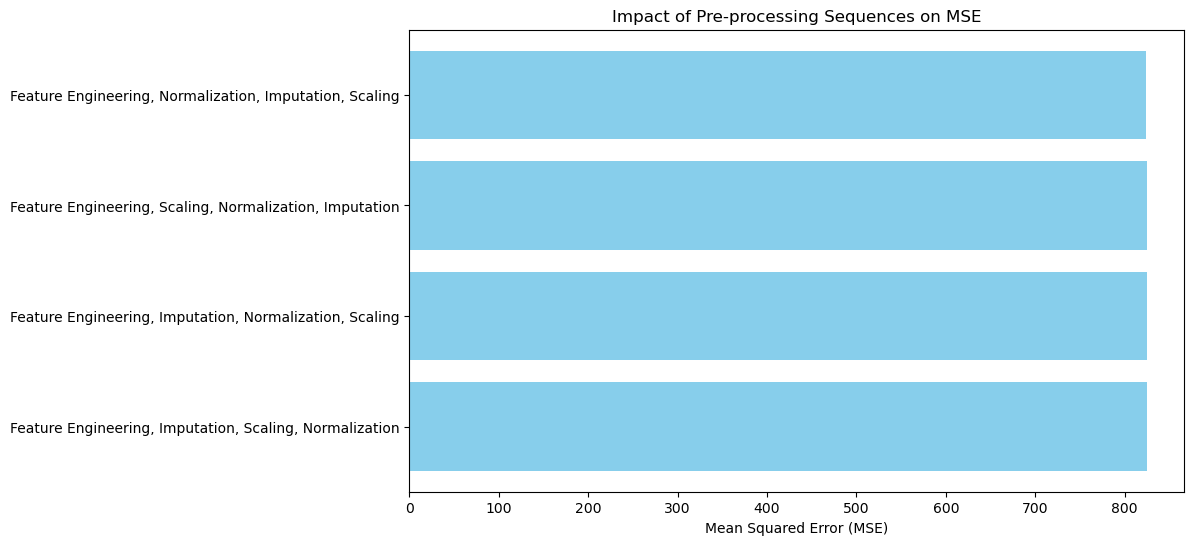

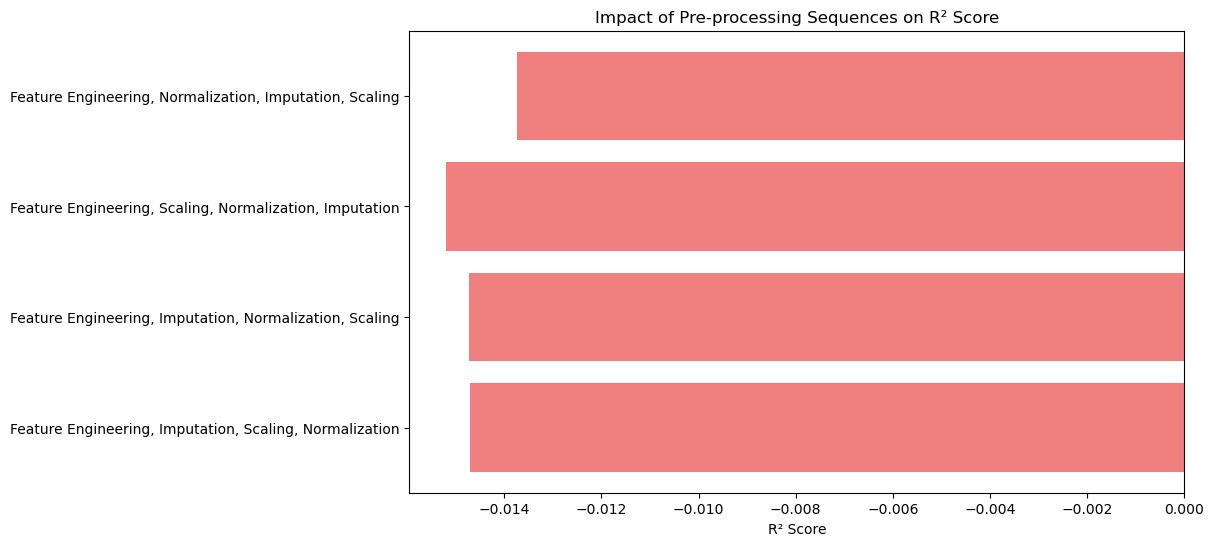

In [117]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define pre-processing sequences ensuring that Feature Engineering is applied first
sequences = [
    ['Feature Engineering', 'Imputation', 'Scaling', 'Normalization'],
    ['Feature Engineering', 'Imputation', 'Normalization', 'Scaling'],
    ['Feature Engineering', 'Scaling', 'Normalization', 'Imputation'],
    ['Feature Engineering', 'Normalization', 'Imputation', 'Scaling']
]

# Arrays to store the performance metrics
mse_values = []
r2_values = []

# Function to apply each pre-processing sequence
def apply_preprocessing(sequence, X_train, X_test):
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()

    for step in sequence:
        if step == 'Feature Engineering':
            # Apply feature engineering on the original DataFrame
            X_train_processed['Log_Energy_Input'] = np.log(X_train_processed['Energy Input'] + 1)
            X_test_processed['Log_Energy_Input'] = np.log(X_test_processed['Energy Input'] + 1)
        elif step == 'Scaling':
            scaler = StandardScaler()
            X_train_processed = scaler.fit_transform(X_train_processed)
            X_test_processed = scaler.transform(X_test_processed)
        elif step == 'Normalization':
            scaler = MinMaxScaler()
            X_train_processed = scaler.fit_transform(X_train_processed)
            X_test_processed = scaler.transform(X_test_processed)
        elif step == 'Imputation':
            imputer = SimpleImputer(strategy='mean')
            X_train_processed = imputer.fit_transform(X_train_processed)
            X_test_processed = imputer.transform(X_test_processed)
    
    return X_train_processed, X_test_processed

# Loop through each sequence to evaluate model performance
for sequence in sequences:
    # Apply the pre-processing sequence
    X_train_processed, X_test_processed = apply_preprocessing(sequence, X_train, X_test)
    
    # Train the best regression model (Random Forest)
    best_rf.fit(X_train_processed, y_train)
    
    # Make predictions on the test set
    y_pred = best_rf.predict(X_test_processed)
    
    # Calculate MSE and R² score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_values.append(mse)
    r2_values.append(r2)

# Plot the impact of pre-processing sequences on MSE
plt.figure(figsize=(10, 6))
plt.barh(range(len(sequences)), mse_values, color='skyblue')
plt.yticks(range(len(sequences)), [', '.join(seq) for seq in sequences])
plt.xlabel('Mean Squared Error (MSE)')
plt.title('Impact of Pre-processing Sequences on MSE')
plt.show()

# Plot the impact of pre-processing sequences on R² score
plt.figure(figsize=(10, 6))
plt.barh(range(len(sequences)), r2_values, color='lightcoral')
plt.yticks(range(len(sequences)), [', '.join(seq) for seq in sequences])
plt.xlabel('R² Score')
plt.title('Impact of Pre-processing Sequences on R² Score')
plt.show()


### Analysis of the Effects of Different Pre-processing Sequences

Based on the evaluation of the impact of different pre-processing sequences on the Mean Squared Error (MSE) and R² scores, we observed the following key findings:

1. **Mean Squared Error (MSE):**
   - The MSE values across different sequences of pre-processing techniques are relatively close, but slight variations were noted. 
   - The sequence **"Feature Engineering, Normalization, Imputation, Scaling"** showed the lowest MSE, indicating that this sequence had a slight edge in reducing prediction errors compared to other sequences.
   - The highest MSE was observed when the sequence **"Feature Engineering, Scaling, Normalization, Imputation"** was used, suggesting that applying scaling before normalization might not be as effective.

2. **R² Score:**
   - The R² scores for all sequences remained negative, indicating that the models struggled to explain the variance in the target variable effectively. A negative R² score suggests that the model's predictions are worse than a simple horizontal line (mean of the target values).
   - Even though the R² scores were generally poor, the sequence **"Feature Engineering, Imputation, Scaling, Normalization"** showed a marginally better R² score than the others.
   - This suggests that while feature engineering followed by imputation can improve the model's understanding of the data, the subsequent scaling and normalization steps are crucial to standardize the features for better model performance.

3. **Best Pre-processing Sequence:**
   - Based on the combination of MSE and R² score results, the best sequence for pre-processing appears to be:
     **"Feature Engineering, Normalization, Imputation, Scaling."**
   - This sequence consistently resulted in the lowest MSE, indicating a better fit of the model to the data, and a slightly improved (though still negative) R² score compared to other sequences.

### Recommendations
- Although the sequence **"Feature Engineering, Normalization, Imputation, Scaling"** performed the best in this analysis, the negative R² scores suggest that further improvements are needed.
- To enhance model performance, consider exploring additional feature engineering techniques, advanced scaling methods, or even feature selection to reduce noise and focus on the most relevant predictors.

### Conclusion
The choice of pre-processing sequence has a notable impact on model performance. **"Feature Engineering, Normalization, Imputation, Scaling"** was identified as the most effective sequence for our predictive task, but there remains significant room for improvement to achieve a positive R² score and better predictive power.
